In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
#import slideUtilities as sl
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

### Confidence Intervals

Say you are concerned with some data that we take as coming from a random process.

You want to characterize it as accurately as possible.   You measure it, yielding a
single value.  

How much does that value tell you?   Can you rely on it as a description of the random process?

Let's say you have a dataset and you compute its average value.   

How certain are you that the average would be the same if you took another dataset from the same source (i.e., the same random process)?

We think of the hypothetical data source as a random variable with a true mean $\mu$.

We would like to find a range within which we are 90% sure that the
true mean $\mu$ lies.  

In other words, we want the probability that the true mean lies in
the interval to be 0.9.  This interval is then called the 90% confidence interval.

To be more precise:  A confidence interval at level $\gamma$ for a fixed
but unknown parameter $m$ is an interval $(a,b)$ such that

$$ P[a < m < b] \geq \gamma. $$

Note that $m$ is fixed --- it is not random.  What is random is the
interval $(a, b)$.  This interval is constructed based on the
data, which (by assumption) are random.

### Confidence Intervals for the Mean

Imagine we have a set of $n$ samples of a random variable,
$x_1, x_2, ..., x_n$ Let's assume that the random variable has mean
$\mu$ and variance $\sigma^2$.

An estimate of $\mu$ is the empirical average of the samples, $\bar{x}$.   

Now, the Central Limit Theorem tells us that the sum of a
large number $n$ of random variables, each with mean $\mu$ and variance
$\sigma^2$, yields a Gaussian random variable with mean
$n\mu$ and variance $n \sigma^2$.   So the distribution of the average
would be normal with mean $\mu$ and variance $\sigma^2 / n$.  That
is, 

$$ \bar{x} \sim N(\mu, \sigma/\sqrt{n}) $$

We usually assume that the number of samples should be 30 or more for
the CLT to hold.   While the specific value 30 is a bit shaky, we will usually be
using very large samples (datasets) in this course for which this assumption is 
valid.

The standard deviation of the sample mean is called the standard error.

Notice that the standard error decreases as we increase the sample size, according to $1/\sqrt{n}.$

So it will turn out that using $\bar{x}$, we can get
increasingly "tight" estimates of $\mu$ as we increase the number of
samples $n$.

Now, remember that the true mean $\mu$ is a constant, while the
empirical mean $\bar{x}$ is a random variable.   

Let us assume for a
moment that we know the true $\mu$ and $\sigma$, and that we accept that
$\bar{x}$ has a $N(\mu, \sigma/\sqrt{n})$ distribution.   

Then it is
true that 

$$ P[\mu-k\sigma/\sqrt{n} < \bar{x} < \mu+k\sigma/\sqrt{n}] = P[-k < S <
k]$$

where $S$ is the standard Gaussian random variable (having distribution $N(0,1)$).

We write $z_{1-\alpha/2}$ to be the $1-\alpha/2$ quantile of the
unit normal.  That is, 

$$ P[-z_{1-\alpha/2} < S < z_{1-\alpha/2}] = 1-\alpha.$$

So to form a 90% probability interval for $S$ (centered on
zero) we choose $k = z_{0.95}$.  

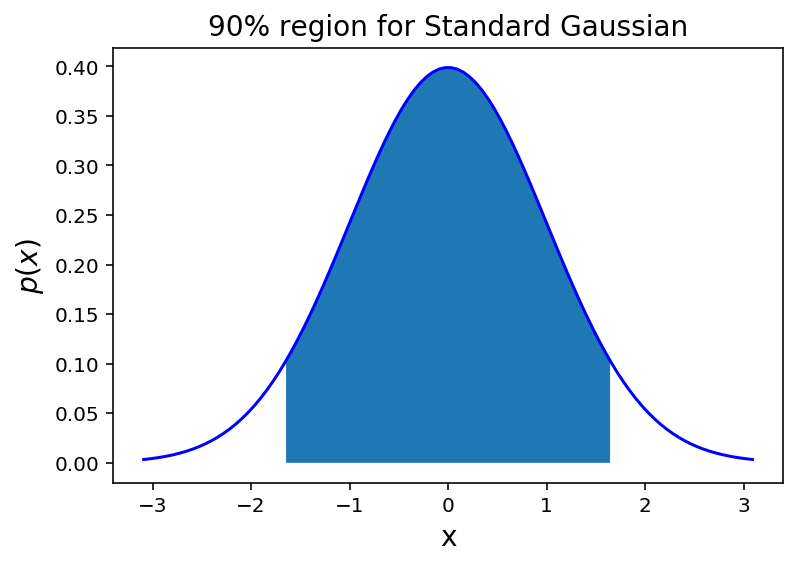

In [34]:
#sl.hide_code_in_slideshow()
from scipy.stats import norm
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
x90 = np.linspace(norm.ppf(0.05), norm.ppf(0.95), 100)
plt.plot(x, norm.pdf(x),'b-')
plt.fill_between(x90, 0, norm.pdf(x90))
plt.title(r'90% region for Standard Gaussian',size=14)
plt.xlabel('x',size=14)
plt.ylabel(r'$p(x)$',size=14)
print('')

Turning back to $\bar{x}$, the
90% probability interval on $\bar{x}$ would be:

$$ \mu-z_{0.95}\sigma/\sqrt{n} < \bar{x} <
\mu+z_{0.95}\sigma/\sqrt{n}. $$

The last step: by a simple argument, we can show that the sample mean is 
in some fixed-size interval centered on the true mean, if and only if the true
mean is also in
a fixed-size interval (of the same size) centered on the sample mean.

This means that:
\begin{eqnarray*}
  1-\alpha & = & P[\mu-z_{1-\alpha/2}\sigma/\sqrt{N} < \bar{x} <
\mu+z_{1-\alpha/2}\sigma/\sqrt{N}]\\
& = & P[\bar{x}-k\sigma\sqrt{N} < \mu < \bar{x}+k\sigma/\sqrt{N}].
\end{eqnarray*}
This latter expression defines the __$1-\alpha$ confidence interval
  for the mean.__

We are done, except for estimating $\sigma$.  We do this
directly from the data: $\hat{\sigma} = s$
(where $s$ is the sample standard deviation, $s = \sqrt{1/(n-1) \sum (x_i
- \bar{x})^2}$).

To summarize: by the argument presented here, a 100(1-$\alpha$)%
confidence interval for the population mean is given by

$$\bar{x} \pm  z_{1-\alpha/2} \, \frac{s}{\sqrt{n}}. $$

As an example, a 95% confidence interval for the mean is the sample average plus or minus two standard errors.

(array([164., 192., 149., 169., 153., 173.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

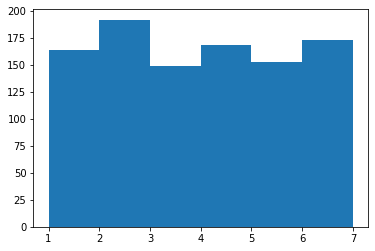

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 1000 #number of tosses
tosses = np.random.randint(1,7,N)
plt.hist(tosses,bins=[1,2,3,4,5,6,7])

In [14]:
A = np.sum(tosses)/N #average
V = np.var(tosses) #variance
print("The observe mean is {} and the observed variance is {}".format(round(A,2),round(V,2)))

The observe mean is 3.47 and the observed variance is 2.96


Recall that the expectation of a die roll is 3.5 and the variance is  105/36 = 2.917.

In [17]:
alpha = 0.1
z = norm.ppf(1-alpha/2) 
# the z-score, i.e. how many standard deviations we need to step to the right of the mean of gaussian
# to achieve the area of 1-alpha/2 under the bell curve
# norm.ppf is the inverse cdf function for the normal distribution.
upper = A+z*(V/N)**0.5
lower = A-z*(V/N)**0.5
print("Thus, we are 90% sure that the mean of a die roll is between {} and {}".format(round(lower,2),round(upper,2)))

Thus, we are 90% sure that the mean of a die roll is between 3.38 and 3.56


### Confidence Intervals for the Median

A $p$th percentile of a distribution is the value $m_p$ such that $P[X <
m_p] = p$.   For example, the median is the 50th percentile.

Say we start with a set of $n$ i.i.d. observations of an RV $X$. 

The true $p$th percentile of $X$ is $m_p$ by definition.  

Each observation
$X_i$ therefore has probability $p$ of being below the corresponding
percentile $m_p$.  

What is the probability that exactly $j$ of the
observations are less than $m_p$?  

This is a standard coin-flipping
problem --- it is given by the Binomial: $B_{n,p}(j)$.

$$ P[\mbox{exactly }j\mbox{ observations are less than } m_p] = B_{n,p}(j). $$

  
We can write this compactly using _order statistics._  For a set
of values $X_1, X_2, ..., X_n$ the order statistics are obtained by
simply sorting the set.  This yields $X_{(1)}, X_{(2)}, ..., X_{(n)}$ ---
so that, for example, $X_{(1)}$ is the smallest of the values and
$X_{(n)}$ is the largest.

Then the above expression can be written:

$$ P[X_{(j)} < m_p \leq X_{(j+1)}] = B_{n,p}(j). $$

Now we can string consecutive intervals together if we like, yielding:

$$ P[X_{(j)} < m_p \leq X_{(k)}] = \sum_{i=j}^k B_{n,p}(i). $$

Now look at this from another standpoint.  

The above expression also
can be read as giving the probability that the $p$th percentile lies between
$X_{(j)}$ and $X_{(k)}$.   

Let's say the sum on the right evaluates to
$\gamma$.   

Then we have shown that $(X_{(j)}, X_{(k)})$ is a confidence
interval at level $\gamma$ for $m_p$.

To use this in practice, let's say we have a set of $n$ measurements and
we want to find the $\gamma$ confidence interval for $p$th percentile.

Then we just 
need to find integers $j$ and $k$ so that 

$$ \sum_{i=j}^k B_{n,p}(i) \geq \gamma. $$

This can be aided if we have a table of the cumulative distribution of
the binomial $F_{n,p}(k)$.   Then we need to find $j$ and $k$ such that

$$ F_{n,p}(k) -  F_{n,p}(j) \geq \gamma. $$

(Remember also that when $np$ is large, we can approximate the binomial
by the Normal distribution).

__Example.__  Let's say we want the 95% confidence interval for the
median, based on the following dataset:

3, 1, 9, 7, 11, 15, 12, 4, 17, 10.

We can compute that for $n = 10$ and $p = 0.5$,  $F_{n,p}(9) -
F_{n,p}(2) \geq 0.95$.  The order statistics are:

1, 3, 4, 7, 9, 10, 11, 12, 15, 17.

Then our estimate of the median is 9.5, and the confidence interval is (3,
15).

## Inequalities

### Union Bound

For *any* events $E_1,E_2,\ldots , E_k$:

$$\text{Pr}[E_1\text{ or } E_2\text{ or }\ldots E_k]\leq \text{Pr}[E_1]+\text{Pr}[E_2]+\ldots + \text{Pr}[E_k]$$

**Pros:** Works even for dependent variables

**Cos:** Sometimes, very loose particularly for mutually independent events:

$$\text{Pr}[E_1\text{ or } E_2\text{ or }\ldots E_k] = 1-\prod_{i=1}^k(1-\text{Pr}[E_i])$$

### Markov Inequality

If $X$ is a positive random variable, then for every $c>0$:

$$ \text{Pr}\left[X\geq c\mathbb{E}[X]\right]\leq \frac{1}{c}$$


**Proof: ?**

**Corollary:** For $c'=c\;\mathbb{E}[X]$ we have: $ \text{Pr}\left[X\geq c'\right]\leq \frac{\mathbb{E}[X]}{c'}$ 


**pros:** It always works

**cons:** 
- Not very precise
- It does not work for the lower tail: $\text{Pr}\left[X\leq c\mathbb{E}[X]\right]$ 

**Example with a fair dice:**

$\text{Pr}[X\geq 4]$?, $\text{Pr}[X\geq 5]$? $\text{Pr}[X\geq 6]$?

$$E[X]=3.5$$
$$c'=4$$

$$\text{Pr}[X\geq 4]\leq \frac{E[X]}{c'}=\frac{3.5}{4}=0.875$$

### Chebyshev's Inequality

For every $c>0$, $\text{Pr}\left[|X-\mathbb{E}[X]|\geq c\;\sqrt{\text{Var}[X]}\right]\leq \frac{1}{c^2}$

**Proof?**

**Corollary:** For $c'=c\;\sqrt{\text{Var}[X]}$ we have that:

$$\text{Pr}\left[|X-\mathbb{E}[X]|\geq c'\right]\leq \frac{\text{Var}[X]}{c'^2}$$ 


**Example 1** Consider a fair dice and compute the bound on the probability: $\text{Pr}\left[V\geq 4\text{ or } V\leq 3\right]$ ? $\text{Pr}\left[V\geq 5\text{ or } V\leq 2\right]$ ? $\text{Pr}\left[V\geq 6\text{ or } V\leq 1\right]$ 

**Example 2** Consider again a fair dice that you roll 10 times and compute the same bounds for $V_{10}=$ average over 10 roles.

**Example 3** Do the same for $V_{1000}$ average over 1000 rolls.


$|x|\geq a$

$x\leq -a$ or $x\geq a$

$|x|\leq a$

$-a\leq x\leq a$

$E[V]=3.5$

$\text{Var}[V]=2.91$

$P[V\geq 4 \text{ or } V\leq 3] = P[|V-3.5|\geq c']$

Find a $c'$ such that:

$|V-3.5|\geq c'\rightarrow V\geq 4 \text{ or } V\leq 3$ 

$V-3.5 \geq c'$ or $V-3.5\leq -c'$

$V-3.5\geq c'\rightarrow V\geq 3.5+c'$ $c'=0.5$

$E[V]=3.5$

$\text{Var}[V]=2.91$

$V\geq 4\rightarrow (V-3.5) \geq 4-3.5 \rightarrow c'=0.5$ 

$|V-3.5|\geq 0.5 \rightarrow V-3.5\leq -0.5$ or $V-3.5\geq +0.5\rightarrow V \geq 4$ or $V\leq 3$

$\text{Pr}\left[V\geq 4\text{ or } V\leq 3\right]=\text{Pr}[|V-3.5|\geq 0.5]\leq \frac{Var[V]}{c'^2}=\frac{2.91}{0.5^2}$ 

$E[V]=3.5$

$\overline{V}=\frac{1}{10}(V_1+V_2+\ldots + V_{10})$

$E[\overline{V}]=\frac{1}{10}(E[V_1]+E[V_2]+\ldots + E[V_{10}])=3.5$


$\text{Var}[\overline{V}]=\text{Var}[\frac{1}{10}(V_1+V_2+\ldots + V_{10})]=\frac{1}{10}\;2.91=0.291$


$\text{Var}[\overline{V}_{10}]=\frac{1}{10}\text{Var}[V_i]$

$\text{Var}[\overline{V}_{n}]=\frac{1}{n}\text{Var}[V_i]$

$E[\overline{V}_n]=E[\overline{V}_{10}]=E[V_i]=3.5$

$c'=0.5$

$P[\overline{V}_n\geq 4 \text{ or } \overline{V}_n\leq 3 ]=P[|\overline{V}_n-3.5|\geq 0.5]\leq \frac{2.91}{n\; 0.5^2}$

### Chernoff Bound

Let $X_1, X_2,\ldots , X_t$ be independent and identically-distributed random variables with range $[0,1]$ and
expected value $\mu$. Then, if $X=\frac{1}{t}\sum_{i=1}^tX_i$ and $0<\delta<1$:

$$\text{Pr}\left[|X-\mu|\geq \delta\mu\right]\leq 2\exp{\left(-\frac{\mu t\delta^2}{3}\right)}$$


**Corollary:** Let $X_1, X_2,\ldots , X_t$ be independent and identically-distributed random variables with range $[0,c]$ and
expected value $\mu$. Then, if $X=\frac{1}{t}\sum_{i=1}^tX_i$ and $0<\delta<1$: 

$$\text{Pr}\left[|X-\mu|\geq \delta\mu\right]\leq 2\exp{\left(-\frac{\mu t\delta^2}{3c}\right)}$$


**Example 1:** Roll a die 10 times 

- $V_{10}$ average over the 10 rolls

- Compute $\text{Pr}\left[V_{10}\geq 4 \text{ and } V_{10}\leq 3\right]$

**Example 2:** Roll a dice 1000 times

Repeat the same computation.



$\overline{V}_n$: the average of $n$ throws of a die

$E[\overline{V}_n]=3.5$

$P[\overline{V}_n\geq 4 \text{ or } \overline{V}_n\leq 3]=P[|\overline{V}_n-3.5|\geq 0.5]\leq 2\exp\left(-\frac{3.5\; n\; 0.14^2}{18}\right)$

$\delta 3.5 = 0.5 \rightarrow \delta = 0.14$



**Problem**: Assume that someone gives you a coin claiming that is fair ($p=1/2)$. In order to test for yourself, you   it 10 times and see 7 heads and 3 tails. How would you go about believing that the coin is indeed fair?